In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [362]:
short = pd.DataFrame ({
'length' : [0,0,0,0,0,0,1.25,1.25,1.5,1.5,1.5,1.5,2,2,2.25,2.25,2.25,2.25,2.25,2.5,2.75,3.0,3.0],
'angle' : [0,0,0,0,0,0,45,45,45,45,45,45,90,90,90,90,90,90,120,125,140,150,150]
})
#short.plot.scatter(x='length',y='angle')

fabric = pd.DataFrame ({
'length' :[0,0,0,0,0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0],
'resistance' : [1807,2100,1981,1805,1700,1705,1906,1900,1804,1795,1411,1617,1449,1503,1536,1492,1593,1601,1412,1448,1111,1210,1189,1095,1183,1043,1192,1043,1013,1121,833,834,876,901,902,926,859,853,898,888,781,750,742,791,728,796,726,744,723,718,696,651,693,685,680,676,670,666,682,672,641,628,635,628,643,652,631,628,626,627,577,581,585,579,565,565,575,572,560,556,529,491,494,490,486,494,482,490,499,480]
})
#fabric.plot.scatter(x='length', y='resistance')

/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


NameError: name 'PolynomialFeatures' is not defined

Intercept: [-7.63253285]
Coefficient: [[47.72995016]]


/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


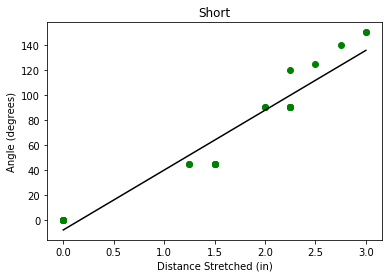

In [364]:
x=short['length']
y=short['angle']
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lm = LinearRegression()
lm.fit(x,y)
predictions = lm.predict(x)
plt.scatter(x,y, c='green')
x = x.reshape(-1,1)
plt.plot(x, lm.predict(x),color='k')
plt.xlabel("Distance Stretched (in)")
plt.ylabel("Angle (degrees)")
plt.title("Short")

print('Intercept:',lm.intercept_)
print('Coefficient:',lm.coef_)
#print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, predictions))  
#print('Mean Squared Error:', metrics.mean_squared_error(ytest, predictions))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))  
plt.savefig('short.eps', format='eps', dpi=1000)

In [365]:
medium = pd.DataFrame ({
'length' : [ 0,  0,  0,  0,  0,  0, 1.75, 1.75, 2.0, 2.0, 2.0, 2.0, 2.5, 2.5, 3.0, 3.0, 3.0, 3.0,    3.5, 3.5, 3.5, 3.5, 3.5, 4.0,4.0],
'angle' : [0,0,0,0,0,0,  45,  45, 45, 45, 45, 45,  90,  90,  90,  90,  90,  90,     145,145,  115,  115,  115,  140, 140]
})
#medium.plot.scatter(x='length',y='angle')

Intercept: [-7.09272785]
Coefficient: [[35.22811475]]


/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


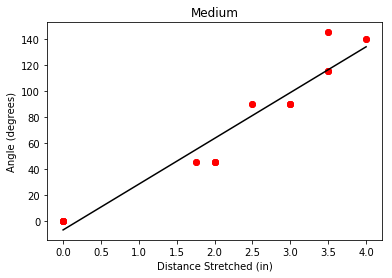

In [370]:
x=medium['length']
y=medium['angle']
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lm = LinearRegression()
lm.fit(x,y)
predictions = lm.predict(x)
plt.scatter(x,y, c='red')
x = x.reshape(-1,1)
plt.plot(x, lm.predict(x),color='k')
plt.xlabel("Distance Stretched (in)")
plt.ylabel("Angle (degrees)")
plt.title("Medium")

print('Intercept:',lm.intercept_)
print('Coefficient:',lm.coef_) 
plt.savefig('medium.eps', format='eps', dpi=1000)

In [367]:
tall = pd.DataFrame ({
'length' :[  0,  0,  0,  0,  0,  0,  0,  0,   2.25, 2.25, 2.5, 2.5, 2.5, 2.5, 2.75, 2.75,      3.5, 3.5,3.75,3.75,   4,   4,  4,  4,   4.25,4.5,  5,  5, 5.25, 5.25, 5.25,5.25],
'angle' : [0,0,0,0,0,0,0,0,    45,  45, 45, 45, 45, 45,  45,  45,       90,  90,  90,  90,  90,  90, 90, 90,      135, 140, 145, 145,   140,   145,   145, 145]
})
#tall.plot.scatter(x='length',y='angle')

/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amanda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


Intercept: [-8.34985823]
Coefficient: [[27.5589525]]


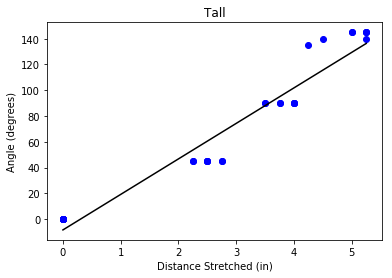

In [369]:
x=tall['length']
y=tall['angle']
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lm = LinearRegression()
lm.fit(x,y)
predictions = lm.predict(x)
plt.scatter(x,y, c='blue')
x = x.reshape(-1,1)
plt.plot(x, lm.predict(x),color='k')
plt.xlabel("Distance Stretched (in)")
plt.ylabel("Angle (degrees)")
plt.title("Tall")

print('Intercept:',lm.intercept_)
print('Coefficient:',lm.coef_)
  
plt.savefig('tall.eps', format='eps', dpi=1000)